# Example 02 - Introduction to Trajectory Data

This example will introduce:

* Load the map matched trajectory data with `mtldp.utils.data_io`
* Basic classes for the trajectory data

After the trajectory data is matched on the map, you can load the trajectory by the data platform (`mtldp`) package.

## 1 Load trajectory data

### 1.1 Load trajectory and matched points from CSV file

In [1]:
from mtldp.utils import show_attributes_and_methods
from mtldp.utils.data_io import build_trajectory_dict_from_csv
import time

s = time.time()
trajs_dict = build_trajectory_dict_from_csv(trajectories_filename='data/2021-09-27_trajs.csv',points_filename='data/2021-09-27_points.csv')
time.time() - s

35.63425016403198

In [2]:
for traj in trajs_dict:
    break

In [3]:
len(traj.df)

10

In [4]:
show_attributes_and_methods(trajs_dict)

attributes: {'dict'}

methods: {'get_points_df', 'append', 'del_trajectory', 'get_trajs_df', 'groupby', 'add_trajectory'}


In [5]:
show_attributes_and_methods(traj)

attributes: {'link_id', 'intervals', 'valid', 'stop_nums', 'spill_over', 'trip_id', 'date', 'stop_delay', 'queue_ratio', 'movement_id', 'control_delay', 'traj_id', 'arrival_time', 'service_level', 'veh_length', 'veh_width', 'cycle_failure', 'eta', 'tod', 'stop_details', 'df', 'junction_id', 'text', 'traj_attributes', 'free_v', 'timestamp', 'queue_dis', 'phase_id', 'date_time', 'total_time', 'pts_num', 'avg_speed', 'total_distance'}

methods: {'check_point_attribute', 'get_traj_df', 'get_point_attributes', 'get_points_df', 'get_time_range', 'add_traj_attributes', 'set_point_attributes', 'drop_duplicates', 'update_trajs_attributes_from_df'}


## 2 Trajectory data structure

There are two data structures to store the trajectory data `TrajectoryDict`, and `Trajectory`. 

### 2.1 `TrajectoryDict`

`TrajectoryDict` is new class that mainly contains a dictionary of all the `Trajectory` objects in the `.dict` member. The key of `.dict` is trip_id, the value is `Trajectory` object.

In [6]:
len(trajs_dict.dict)

637779

### 2.3 `Trajectory`

`Trajectory` contains all attributes of a trajectory. You can fetch a trajectory from a `TrajectoryDict` object.

In [7]:
traj = trajs_dict.dict["006eb1ddec08e2ffac0a01c7f11c487316a8a44f-1632745748"]

traj.df[0:3]

trip_id  \
3610  006eb1ddec08e2ffac0a01c7f11c487316a8a44f   
3611  006eb1ddec08e2ffac0a01c7f11c487316a8a44f   
3612  006eb1ddec08e2ffac0a01c7f11c487316a8a44f   

                                                traj_id junction_id  \
3610  006eb1ddec08e2ffac0a01c7f11c487316a8a44f-16327...    62127887   
3611  006eb1ddec08e2ffac0a01c7f11c487316a8a44f-16327...    62127887   
3612  006eb1ddec08e2ffac0a01c7f11c487316a8a44f-16327...    62127887   

                link_id  segment_id                 movement_id  phase_id  \
3610  62058105_62127887  7558579851  62058105_62127887_61977976         2   
3611  62058105_62127887  7558579851  62058105_62127887_61977976         2   
3612  62058105_62127887  7558579851  62058105_62127887_61977976         2   

         timestamp        date date_time       tod   latitude  longitude  \
3610  1.632746e+09  2021-09-27     08:28  8.472778  42.547322 -83.192781   
3611  1.632746e+09  2021-09-27     08:28  8.473611  42.547311 -83.193415   
3612  1.632746e+09  2021-09-27     08:28  8.474722  42.547302 -83.193949   

        distance  arrival_time      speed     error  heading  elevation  
3610 -221.689549  1.632746e+09  17.597236  1.138452    182.0      194.0  
3611 -169.723550  1.632746e+09  16.319458  2.554720    182.0      195.0  
3612 -125.954757  1.632746e+09  13.438900  4.274432    182.0      194.0

In [8]:
from mtldp.utils.time import timestamp_to_date_time_and_tod

In [9]:
timestamp_to_date_time_and_tod(1632745746.6686296)

('2021-09-27', '12:29', 12.483333333333333)

In [10]:
times, lats, lons, errors = traj.get_point_attributes("timestamp", "latitude", "longitude", "error")

times[:3], lats[:3]

([1632745702.624, 1632745705.621, 1632745709.119],
 [42.547322, 42.547311, 42.547302])

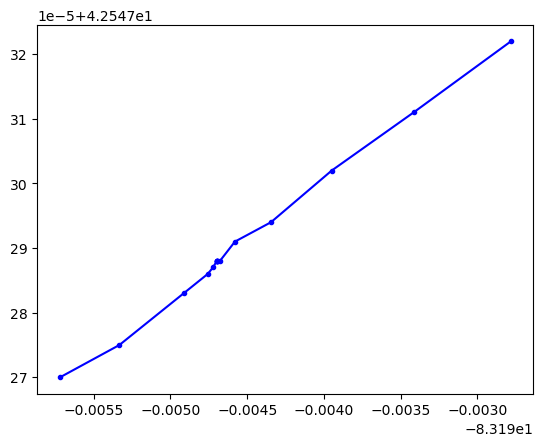

In [11]:
# Plot the shape of the trajectory

import matplotlib.pyplot as plt

plt.plot(lons, lats, "b.-")
plt.show()

You can plot the time-space diagram of a trajectory at a movement.